Data Cleaning and PreProcessing

In [3]:
import pandas as pd
import glob

# Path to your Excel file
excel_file = '/home/smirithi/Downloads/Bird_Monitoring_Data_FOREST.XLSX'

# Load all sheet names
xls = pd.ExcelFile(excel_file)
sheet_names = xls.sheet_names

# Combine all sheets into one DataFrame
dfs = []
for sheet in sheet_names:
    df = pd.read_excel(excel_file, sheet_name=sheet)
    df['Admin_Unit_Code'] = sheet  # add sheet info
    dfs.append(df)

# Merge all sheets into one DataFrame
bird_data = pd.concat(dfs, ignore_index=True)

# Display basic info
print(bird_data.info())

# Drop duplicates
bird_data.drop_duplicates(inplace=True)

# Handling missing values (example: fill NAs or drop)
bird_data = bird_data.dropna(subset=['Scientific_Name', 'Location_Type'])

# Standardize columns (if necessary)
bird_data['Location_Type'] = bird_data['Location_Type'].str.strip().str.title()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              8546 non-null   object        
 1   Sub_Unit_Code                722 non-null    object        
 2   Site_Name                    8546 non-null   object        
 3   Plot_Name                    8546 non-null   object        
 4   Location_Type                8546 non-null   object        
 5   Year                         8546 non-null   int64         
 6   Date                         8546 non-null   datetime64[ns]
 7   Start_Time                   8546 non-null   object        
 8   End_Time                     8546 non-null   object        
 9   Observer                     8546 non-null   object        
 10  Visit                        8546 non-null   int64         
 11  Interval_Length              8546 non-null 

Exploratory Data Analysis

Temporal Analysis - Trends by year, season, and time of day.

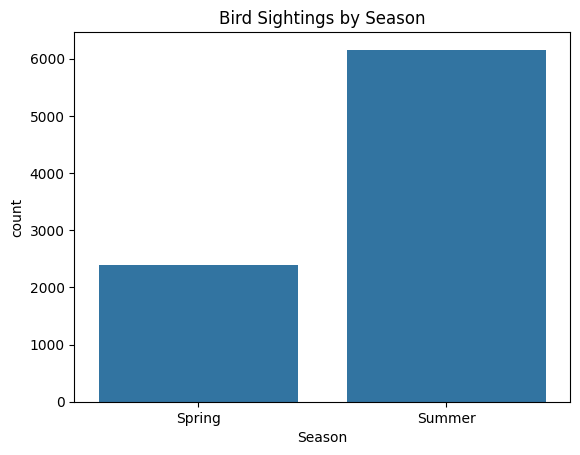

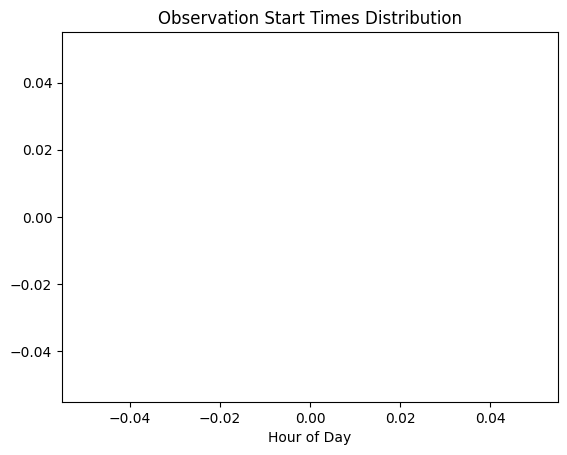

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date and Time columns
bird_data['Date'] = pd.to_datetime(bird_data['Date'])
bird_data['Month'] = bird_data['Date'].dt.month
bird_data['Year'] = bird_data['Date'].dt.year

# Seasonal grouping
def get_season(month):
    if month in [3,4,5]: return 'Spring'
    elif month in [6,7,8]: return 'Summer'
    elif month in [9,10,11]: return 'Fall'
    else: return 'Winter'

bird_data['Season'] = bird_data['Month'].apply(get_season)

# Plot sightings by season
sns.countplot(data=bird_data, x='Season')
plt.title('Bird Sightings by Season')
plt.show()

# Observation time analysis
bird_data['Start_Hour'] = pd.to_datetime(bird_data['Start_Time'], errors='coerce').dt.hour
sns.histplot(bird_data['Start_Hour'].dropna(), bins=24)
plt.title("Observation Start Times Distribution")
plt.xlabel("Hour of Day")
plt.show()


Spatial Analysis - diversity by location

Location_Type
Forest    108
Name: Scientific_Name, dtype: int64


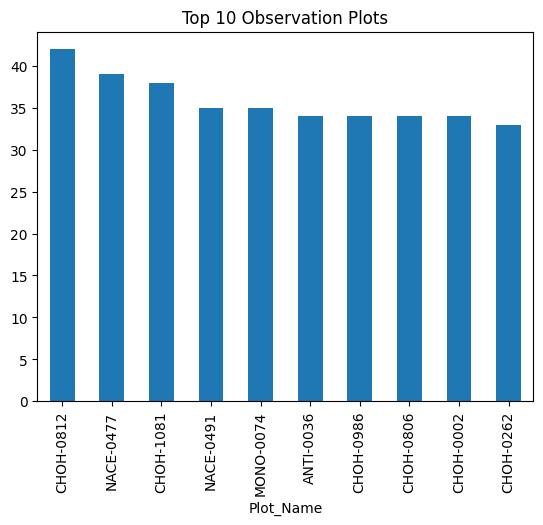

In [5]:
# Group by Location Type
location_counts = bird_data.groupby('Location_Type')['Scientific_Name'].nunique().sort_values(ascending=False)
print(location_counts)

# Plot by Plot_Name
top_plots = bird_data['Plot_Name'].value_counts().head(10)
top_plots.plot(kind='bar', title='Top 10 Observation Plots')
plt.show()


SPECIES ANALYSIS 

Total unique bird species: 108
Location_Type
Forest    108
Name: Scientific_Name, dtype: int64
ID_Method
Singing          5430
Calling          2677
Visualization     438
Name: count, dtype: int64


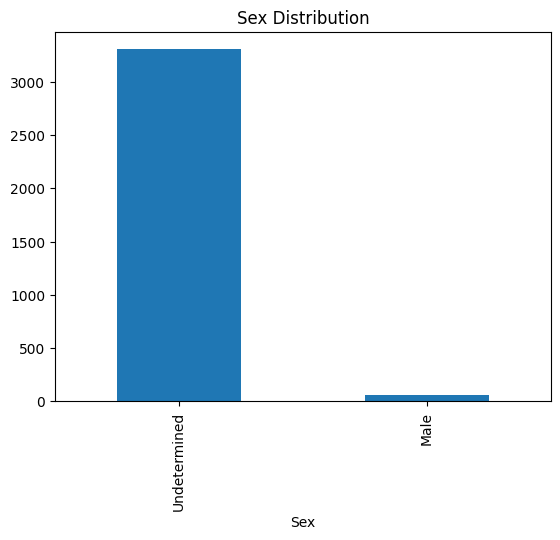

In [6]:
# Unique species count
total_species = bird_data['Scientific_Name'].nunique()
print(f"Total unique bird species: {total_species}")

# Diversity by habitat
species_by_habitat = bird_data.groupby('Location_Type')['Scientific_Name'].nunique()
print(species_by_habitat)

# Activity pattern (e.g., Singing)
activity_counts = bird_data['ID_Method'].value_counts()
print(activity_counts)

# Sex Ratio
sex_counts = bird_data['Sex'].value_counts()
sex_counts.plot(kind='bar', title='Sex Distribution')
plt.show()


ENVIRONMENTAL CONDITIONS 

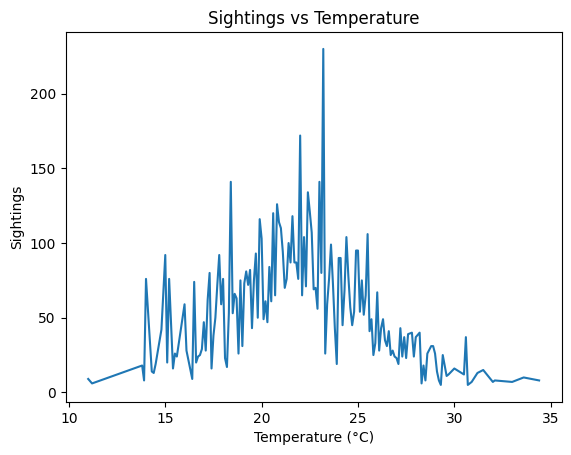

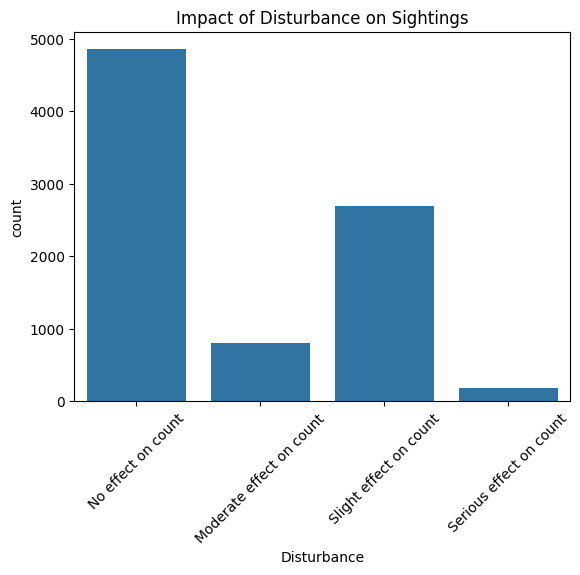

In [7]:
# Correlation between Temp/Humidity and Observation Counts
env_group = bird_data.groupby('Temperature')['Scientific_Name'].count()
env_group.plot()
plt.title("Sightings vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Sightings")
plt.show()

# Disturbance Effect
sns.countplot(data=bird_data, x='Disturbance')
plt.title("Impact of Disturbance on Sightings")
plt.xticks(rotation=45)
plt.show()


DISTANCE AND BEHAVIOR

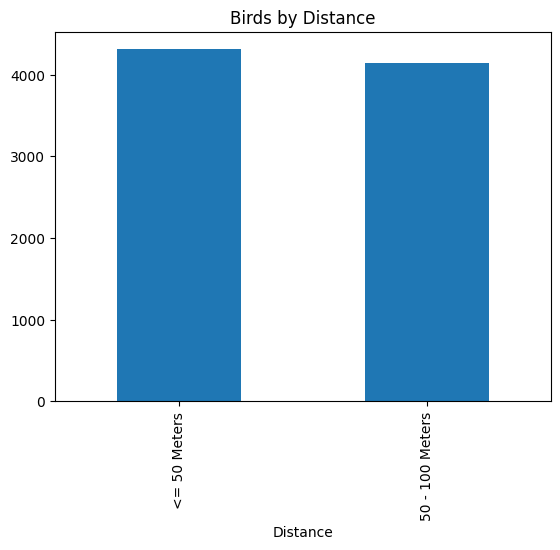

Flyover_Observed
False    0.989235
True     0.010765
Name: proportion, dtype: float64


In [8]:
# Distance grouping
distance_counts = bird_data['Distance'].value_counts()
distance_counts.plot(kind='bar', title='Birds by Distance')
plt.show()

# Flyover trend
flyover_rate = bird_data['Flyover_Observed'].value_counts(normalize=True)
print(flyover_rate)


OBSERVER TRENDS 

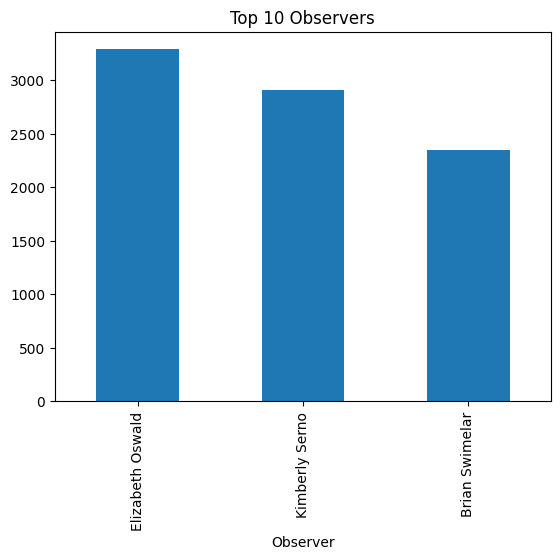

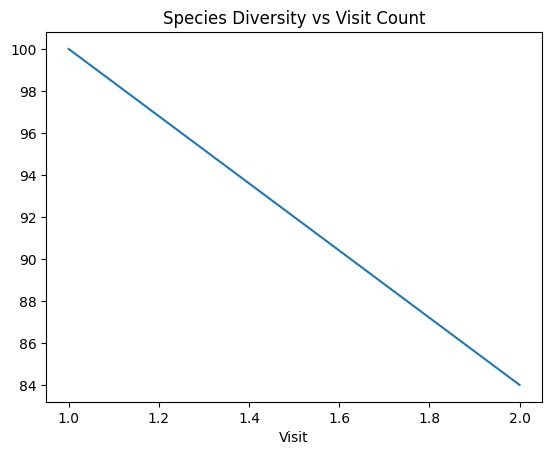

In [9]:
# Observer activity
observer_counts = bird_data['Observer'].value_counts().head(10)
observer_counts.plot(kind='bar', title='Top 10 Observers')
plt.show()

# Visits effect
visit_impact = bird_data.groupby('Visit')['Scientific_Name'].nunique()
visit_impact.plot(title="Species Diversity vs Visit Count")
plt.show()


CONSERVATION INSIGHTS

In [10]:
# Watchlist Species
watchlist = bird_data[bird_data['PIF_Watchlist_Status'] == True]
print(f"Watchlist species count: {watchlist['Scientific_Name'].nunique()}")

# Regional stewardship
steward_species = bird_data[bird_data['Regional_Stewardship_Status'] == True]



Watchlist species count: 7


In [11]:
print(f"Regional stewardship species: {steward_species['Scientific_Name'].nunique()}")


Regional stewardship species: 20


Exporting cleaned data t new CSV

In [13]:
bird_data.to_csv('cleaned_bird_sightings.csv', index=False)

In [14]:
print(bird_data.columns)

Index(['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name',
       'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer',
       'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed',
       'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode',
       'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Initial_Three_Min_Cnt', 'Month', 'Season', 'Start_Hour'],
      dtype='object')
